#                     Restaurant Rating Prediction

### Problem Statement : 

## Column list :

url : url of zomato website                                
address : address of restaurant                             
name : name of the restaurant                           
online_order : online order avilable or not in restaurant  
book_table : table book option                    
rate : rating of the restaurant out of 5                  
votes : total number of rating for the restaurant as of the above mentioned date
phone : phone number of the restaurant                       
location : where restaurant located                 
rest_type : restaurant type                         
dish_type : people liked dish in restaurant       
cuisines : food styles                              
approx_item(for two people) : approximate cost for meal for two people                                 
review_list : list of reviews for the restaurant      
menu_item : menus available in the restaurant         
list_in(type) : type of meal                          
list_in(city) : the neighborhood in which the restaurant is listed

## Importing Section

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

### Loading Dataset

In [2]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
# size of the dataset
df.shape

(51717, 17)

In [4]:
# Column list in Dataset
df.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [5]:
# rename columns name
df.rename(columns = {'approx_cost(for two people)' : 'approx_cost', 'listed_in(city)' : 'Place'}, inplace = True)

In [6]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,listed_in(type),Place
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data Cleaning

Now, we clean our data by dropping the irrelevant columns, handling the wrong datatypes, handling the null values and the outliers

#### Dropping Irrelevant Columns

In [7]:
df.drop(['url','address','menu_item','reviews_list','dish_liked','phone','listed_in(type)'],inplace=True,axis=1)

In [8]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,Place
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


In [9]:
# check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   Place         51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [10]:
# checking unique values in rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#### Check null values, wrong datatypes or both

#### Rate column

In [11]:
# Replacing the null values and garbage values & convert into number
df['rate'] = df['rate'].str.replace("/5", "")
df['rate'] = df['rate'].str.replace("nan", "NaN")
df['rate'] = df['rate'].str.replace("NEW", "NaN")
df['rate'] = df['rate'].str.replace("-", "NaN")
df['rate'] = df['rate'].str.replace(" /5", "")
df['rate'] = df['rate'].fillna(np.nan)
df['rate'] = df['rate'].str.replace(" ", "")

In [12]:
#Checking the Results
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [13]:
#changing the datatypes in rate column from obj to float
df['rate'] = df['rate'].astype(float)

In [14]:
# check rate column 
df.info('rate')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  object 
 9   Place         51717 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.9+ MB


#### Approx Cost Column

In [15]:
# checking the unique values in the approx cost column in Data
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [16]:
# Replacing the null values and convert
df['approx_cost'] = df['approx_cost'].str.replace("nan", "NaN")
df["approx_cost"] = df["approx_cost"].fillna("NaN")
df["approx_cost"] = df["approx_cost"].str.replace(",", "")

In [17]:
# check unique value in dataset
df["approx_cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [18]:
# change the datatype of columns from object to float
df["approx_cost"] = df["approx_cost"].astype(float)

In [19]:
# check dtype of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   Place         51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


## Checking Null values 

In [20]:
df.isna().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
Place               0
dtype: int64

In [21]:
# Null value percentage check
(df.isna().sum() / df.shape[0])*100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
Place            0.000000
dtype: float64

in this dataset -> location, rest_type, cuisines, approx_cost is less number of null values as compare to rate column

In [22]:

# Droping a null values from columns having less number of null values
df = df[df['location'].notna()]
df = df[df['rest_type'].notna()]
df = df[df['cuisines'].notna()]
df = df[df['approx_cost'].notna()]


In [23]:
#check the result
df.isna().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
Place              0
dtype: int64

Handling Null values in rate column

In [24]:
#check the mean, median, mode and statistics etc.
df['rate'].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [25]:
# imputing the values, we can check for the outliers
q1 = df['rate'].quantile(0.25)
q3 = df['rate'].quantile(0.75)
qr = q3-q1
low_rng = q1 - (1.5 * qr)
upr_rng = q3 + (1.5 * qr)

outliers = len(df[(df['rate'] < low_rng) | (df['rate'] > upr_rng)])

print("Num of rows in outliers is",outliers)

Num of rows in outliers is 183


Here we have 183 rows in outliers , but rating are always in the range from 1.0 to 5.0, so using mean is not appropriate. that's why , we can impute with median.

In [26]:
#impute the null values with rate column
df['rate'] = df['rate'].fillna(df['rate'].median())

In [27]:
#check the result
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
Place           0
dtype: int64

In [28]:
# completed that part dropping values, then we will reset the index
df.reset_index(inplace=True)

df.drop(['index'],axis=1,inplace=True)

# Data Visualization

First of all we will visualize our data 
Based on different parameters 

#### 1. Number of orders vs Restaurants

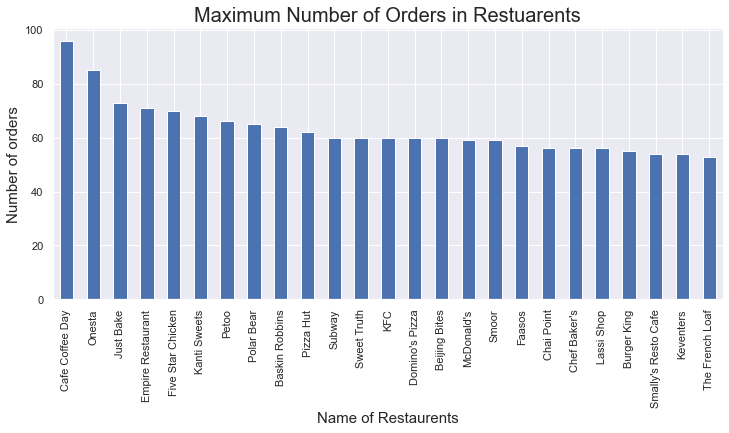

In [29]:
# checking the restraurants have higer number of orders

plt.figure(figsize= (12,5))
data = df['name'].value_counts()[:25]
data.plot(kind = 'bar')

plt.xlabel('Name of Restaurents', size=15)
plt.ylabel('Number of orders', size=15)
plt.title('Maximum Number of Orders in Restuarents',fontsize=20)
plt.show()

#### 2. Number of Resaurents having online order facilites

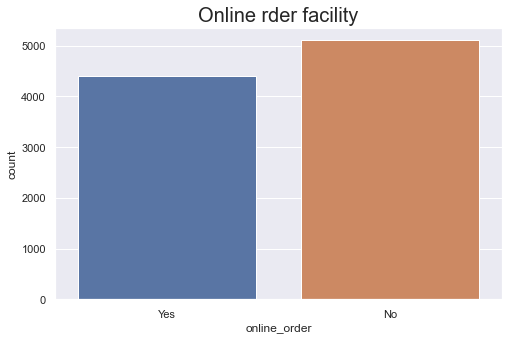

In [30]:
# checking online order facility 
data = df[['name', 'online_order']].drop_duplicates()

plt.figure(figsize=(8,5))
xyz = sns.countplot(x='online_order',data = data).set_title('Online rder facility',fontsize = 20)

plt.show()

 we can see that only 4397 restaurants in Banglore have Online Order Facility which less than the half of the restaurants.

#### 3. Number of restaurants having Prebooking table facility

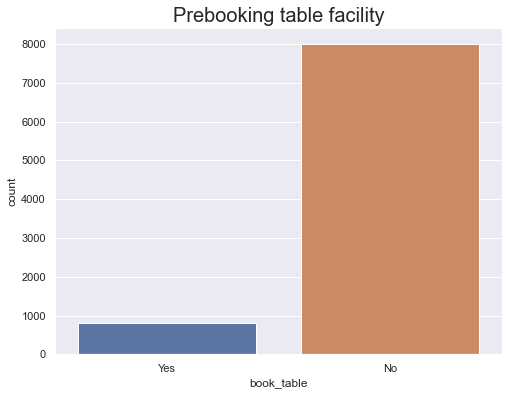

In [31]:
# prebooking table facility
data = df[['name', 'book_table']].drop_duplicates()

plt.figure(figsize=(8,6))
xyz = sns.countplot(x = 'book_table',data=data).set_title('Prebooking table facility',fontsize = 20)
plt.show()

we can see in this chart most of the rastaurents in banglore doesn't have prebooking facility which is about 8011 restaurents and only 820 restauarants having these facility.

#### 4. Most Common Rating for orders

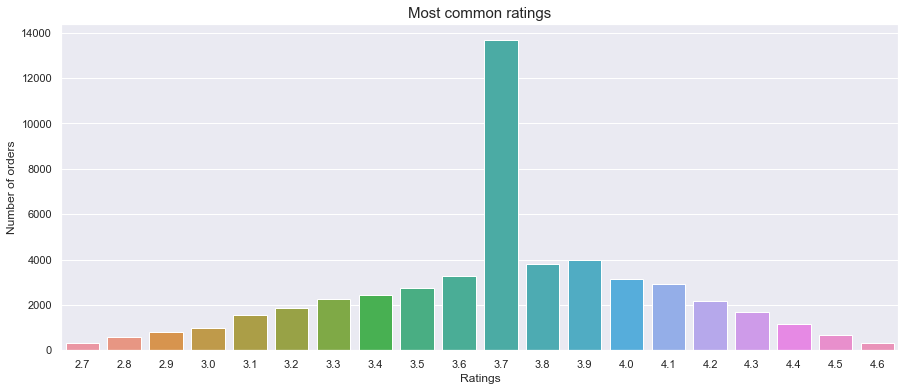

In [32]:
# checking the most common rating for orders
data = df.rate.value_counts().reset_index()[:20]

plt.figure(figsize=(15,6))
sns.barplot(x = data['index'], y = data['rate'])

plt.xlabel('Ratings')
plt.ylabel('Number of orders')
plt.title('Most common ratings',size=15)

plt.show()


 we can see number of order got good 3.7 rating for the restaurants.

#### 5. Top locations got Higher number of orders

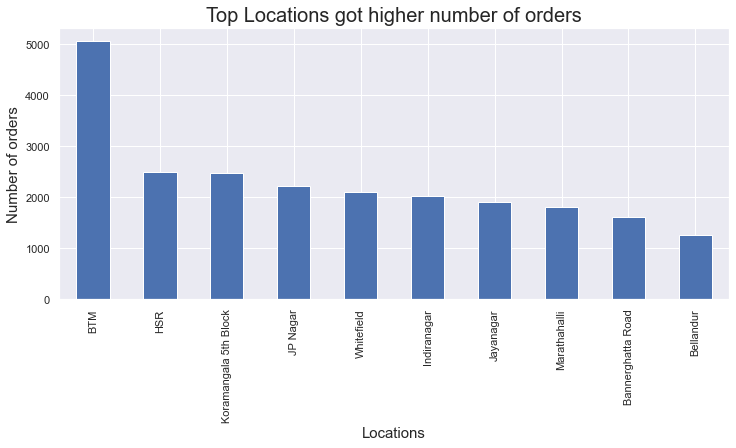

In [33]:
# checking top locations for higher number of order
plt.figure(figsize=(12,5))
data = df.location.value_counts()[:10]
data.plot(kind='bar')
plt.xlabel('Locations',fontsize=15)
plt.ylabel('Number of orders',fontsize=15)
plt.title('Top Locations got higher number of orders', size=20)

plt.show()

In this chart , Location BTM got higer number of order amoung all other locations. Also HSR and Koramangala 5th Block Location got good number of order.

### Common Approximate Costs for  meal of two people

In [34]:
data = pd.DataFrame(df["approx_cost"].value_counts().reset_index()[:20])
data.columns = ['approx_cost','count']
data = data.set_index('approx_cost')

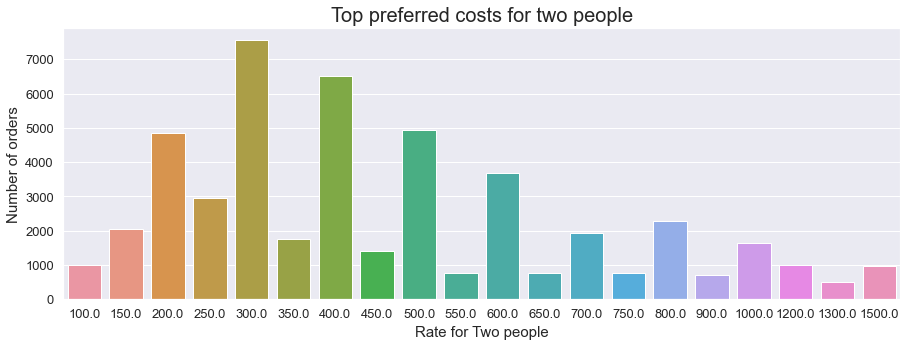

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x = data.index, y = data['count'])
plt.xlabel('Rate for Two people',size=15)
plt.ylabel('Number of orders', size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title('Top preferred costs for two people',size =20)
plt.show()

### Restaurent Type Vs Number of orders

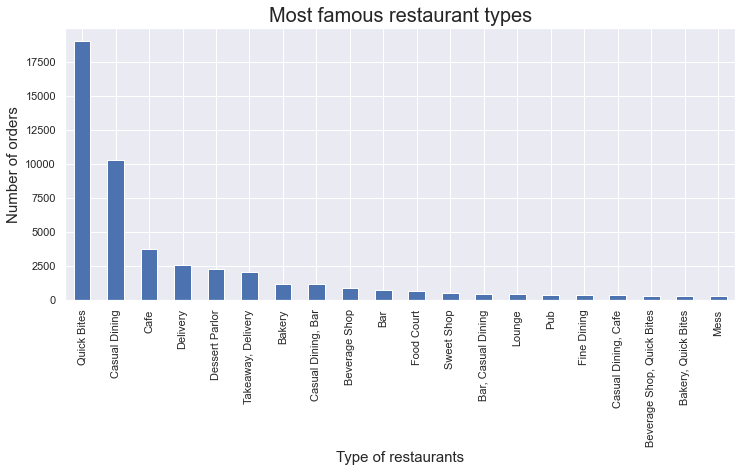

In [36]:
plt.figure(figsize=(12,5))
xyz = df.rest_type.value_counts()[:20]
xyz.plot(kind='bar')
plt.title("Most famous restaurant types", fontsize=20)
plt.xlabel("Type of restaurants",fontsize=15)
plt.ylabel("Number of orders", fontsize=15)

plt.show()

### Top locations with most number of restaurants

In [37]:
tops_areas = pd.DataFrame(df.groupby(by='location')['name'].nunique())
tops_areas.columns=['count']
tops_areas.sort_values(by='count', ascending= False, inplace=True)

In [38]:
tops_areas

,count
location,
Whitefield,812
BTM,695
Electronic City,691
HSR,678
Marathahalli,651
...,...
Langford Town,2
Rajarajeshwari Nagar,2
Jakkur,1


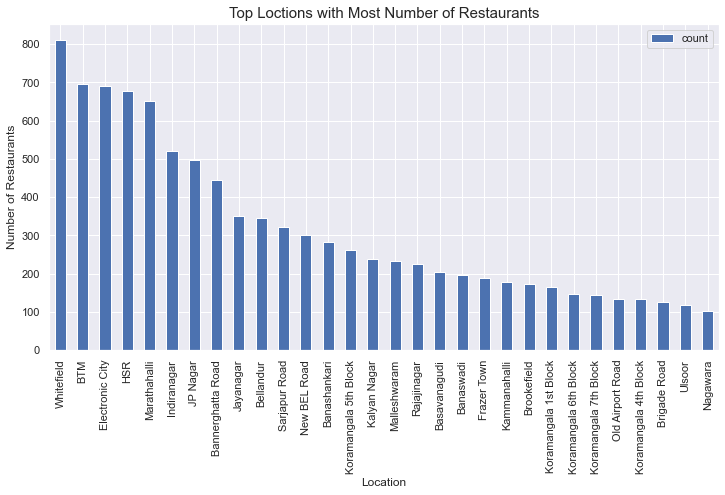

In [39]:
plt.rcParams['figure.figsize'] = (12,6)
xyz = tops_areas[:30].plot(kind='bar')
plt.xlabel('Location', size=12)
plt.ylabel('Number of Restaurants', size=12)
plt.title('Top Loctions with Most Number of Restaurants', size=15)
plt.show()



### Most famous Cuisines among people

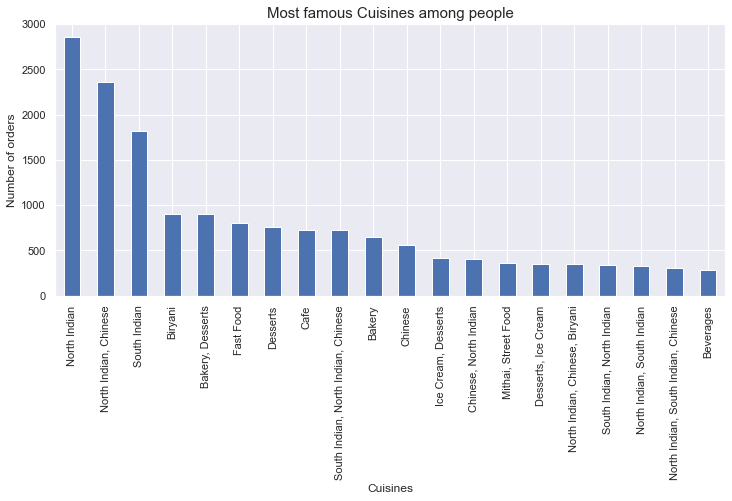

In [40]:
plt.figure(figsize=(12,5))
xyz = df.cuisines.value_counts()[:20].plot(kind='bar')
plt.title("Most famous Cuisines among people", fontsize=15)
plt.xlabel("Cuisines")
plt.ylabel("Number of orders")
plt.show()

#### Top Areas with most number of restaurants

In [41]:
tops_areas = pd.DataFrame(df.groupby(by='Place')['name'].nunique())
tops_areas.columns = ['count']
tops_areas.sort_values(by='count',ascending=False, inplace=True)

In [42]:
tops_areas.head()

,count
Place,
BTM,2012
Koramangala 7th Block,1775
Koramangala 5th Block,1738
Koramangala 4th Block,1703
Koramangala 6th Block,1603


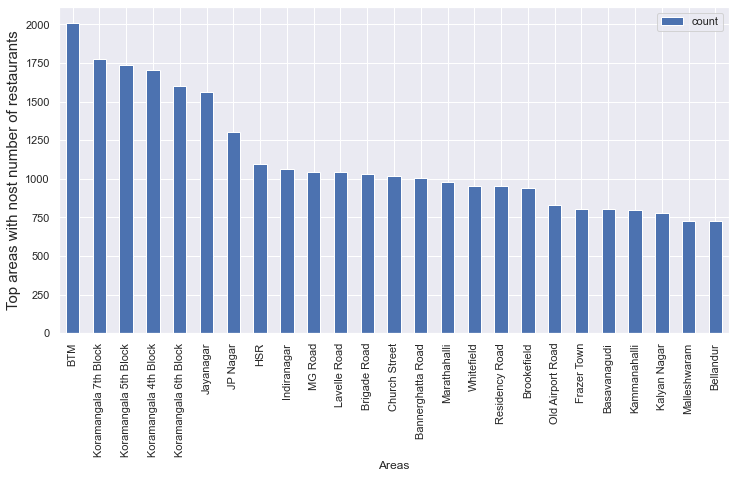

In [43]:
plt.rcParams['figure.figsize']=(12,6)
xyz = tops_areas[0:25].plot(kind='bar')
plt.xlabel('Areas',size=12)
plt.ylabel('Top areas with nost number of restaurants', size=15)
plt.show()

# Encoding Columns

### Online order column

In [44]:
df['online_order'] = df['online_order'].replace({"yes":1, "No":0})
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,Place
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


### Book Table Column

In [45]:
df['book_table'] = df['book_table'].replace({"Yes":1,"No":0})
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,Place
0,Jalsa,Yes,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


### Rest Type Column

In [46]:
rest_df = pd.DataFrame(df['rest_type'])
x = list(rest_df.rest_type.str.split(", "))
unique_x = list(set([i for sub_list in x for i in sub_list]))

for i in unique_x:
    rest_df[i] = int(0)

In [47]:
rest_df.head()

,rest_type,Bakery,Club,Fine Dining,Confectionery,Casual Dining,Microbrewery,Quick Bites,Sweet Shop,Bhojanalya,...,Food Truck,Pub,Food Court,Kiosk,Mess,Irani Cafee,Lounge,Dhaba,Delivery,Pop Up
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
count=0
for y in x:
    rest_df.loc[count,y] = int(1)
    count+=1 

In [49]:
rest_df.head()

,rest_type,Bakery,Club,Fine Dining,Confectionery,Casual Dining,Microbrewery,Quick Bites,Sweet Shop,Bhojanalya,...,Food Truck,Pub,Food Court,Kiosk,Mess,Irani Cafee,Lounge,Dhaba,Delivery,Pop Up
0,Casual Dining,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
rest_df.drop(['rest_type'], axis=1, inplace=True)
rest_df.head()

,Bakery,Club,Fine Dining,Confectionery,Casual Dining,Microbrewery,Quick Bites,Sweet Shop,Bhojanalya,Dessert Parlor,...,Food Truck,Pub,Food Court,Kiosk,Mess,Irani Cafee,Lounge,Dhaba,Delivery,Pop Up
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cuisines column

In [51]:
df1 = pd.DataFrame(df['cuisines'])
cuisines = list(df1.cuisines.str.split(", "))
unique_c = list(set([cs for sub_list in cuisines for cs in sub_list]))
unique_c.remove("Cafe")
unique_c.remove("Bakery")

for cs in unique_c:
    df1[cs] = 0

df1.head()

C:\Users\samir saiyed\AppData\Local\Temp\ipykernel_15160\3710925419.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[cs] = 0
C:\Users\samir saiyed\AppData\Local\Temp\ipykernel_15160\3710925419.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[cs] = 0
C:\Users\samir saiyed\AppData\Local\Temp\ipykernel_15160\3710925419.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

,cuisines,Jewish,Salad,Roast Chicken,Biryani,Coffee,Thai,Sri Lankan,Sindhi,Drinks Only,...,Cantonese,Pizza,Korean,Asian,Bubble Tea,Afghani,Singaporean,Malwani,Steak,Parsi
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
corrected_cuisines = []
for i in cuisines:
    if "Cafe" in i:
        i.remove("Cafe")
    
    if "Bakery" in i:
        i.remove("Bakery")

    corrected_cuisines.append(list(set(i)))

In [53]:
count = 0
for i in corrected_cuisines:
    df1.loc[count, i] = int(1)
    count+=1

In [54]:
df1.head()

,cuisines,Jewish,Salad,Roast Chicken,Biryani,Coffee,Thai,Sri Lankan,Sindhi,Drinks Only,...,Cantonese,Pizza,Korean,Asian,Bubble Tea,Afghani,Singaporean,Malwani,Steak,Parsi
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df1.drop(['cuisines'], axis = 1, inplace=True)
df1.head()

,Jewish,Salad,Roast Chicken,Biryani,Coffee,Thai,Sri Lankan,Sindhi,Drinks Only,Street Food,...,Cantonese,Pizza,Korean,Asian,Bubble Tea,Afghani,Singaporean,Malwani,Steak,Parsi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Location Column

In [56]:
loc_df = df['location']
loc_df = pd.get_dummies(loc_df)

In [57]:
loc_df.head()

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Place Column

In [58]:
place_df = df['Place']
place_df = pd.get_dummies(place_df)
place_df.head()

,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#Data with Location
data_with_location = pd.concat([df, rest_df, df1, loc_df], axis = 1)
data_with_location.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,Place,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,Yes,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,Yes,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,Yes,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#Data with Places
data_with_place = pd.concat([df, rest_df, df1, place_df], axis=1)
data_with_place.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,Place,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,Jalsa,Yes,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,Yes,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,Yes,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#data_with_location.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'Place', 'online_order'], axis = 1, inplace=True)
#data_with_place.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'Place','online_order'], axis=1, inplace=True)

In [68]:
print(data_with_location.columns[200:])

Index(['Race Course Road', 'Rajajinagar', 'Rajarajeshwari Nagar',
       'Rammurthy Nagar', 'Residency Road', 'Richmond Road', 'Sadashiv Nagar',
       'Sahakara Nagar', 'Sanjay Nagar', 'Sankey Road', 'Sarjapur Road',
       'Seshadripuram', 'Shanti Nagar', 'Shivajinagar', 'South Bangalore',
       'St. Marks Road', 'Thippasandra', 'Ulsoor', 'Uttarahalli',
       'Varthur Main Road, Whitefield', 'Vasanth Nagar', 'Vijay Nagar',
       'West Bangalore', 'Whitefield', 'Wilson Garden', 'Yelahanka',
       'Yeshwantpur'],
      dtype='object')


## Feature Selection

In [63]:
x1 = data_with_location.drop("rate",axis=1).values
y1 = data_with_location["rate"].values

print("X = ",x1)
print("Y = ",y1)

X =  [[1.00e+00 7.75e+02 8.00e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 7.87e+02 8.00e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 9.18e+02 8.00e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [0.00e+00 0.00e+00 2.00e+03 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.00e+00 2.36e+02 2.50e+03 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.30e+01 1.50e+03 ... 0.00e+00 0.00e+00 0.00e+00]]
Y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


In [70]:
x2 = data_with_place.drop("rate",axis=1).values
y2 = data_with_place["rate"].values
print("X = ",x2)

print("Y = ",y2)

X =  [[1.00e+00 7.75e+02 8.00e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 7.87e+02 8.00e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 9.18e+02 8.00e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [0.00e+00 0.00e+00 2.00e+03 ... 0.00e+00 0.00e+00 1.00e+00]
 [1.00e+00 2.36e+02 2.50e+03 ... 0.00e+00 0.00e+00 1.00e+00]
 [0.00e+00 1.30e+01 1.50e+03 ... 0.00e+00 0.00e+00 1.00e+00]]
Y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


In [65]:
from sklearn.ensemble import ExtraTreesRegressor

In [66]:
# Extracting Imp. Features from data with location Dataframe
imp_features1 = ExtraTreesRegressor()
imp_features1.fit(x1, y1)
print(imp_features1.feature_importances_)

[ 1.65060436e-01  3.00545970e-01  5.07017977e-02  3.16126100e-03
  8.68024009e-05  6.22623607e-04  1.17854824e-05  1.05257222e-02
  7.03438532e-04  1.05997801e-02  6.69846513e-04  9.38249396e-07
  3.22741481e-03  3.12081490e-03  1.37088065e-03  2.78432191e-03
  1.25063833e-02  7.86716763e-06  1.03272949e-04  1.87641176e-03
  3.44342952e-03  3.75847664e-04  8.76020966e-04  8.39302571e-07
  3.60310748e-03  1.67315376e-04  5.46252836e-03  3.04990249e-16
  2.34697059e-06  2.73976206e-03  2.15907987e-05  1.11049627e-02
  3.22080579e-04  2.07899852e-03  2.29146671e-06  1.74098718e-05
  6.65760940e-07  6.43396506e-03  2.03813574e-03  2.42971484e-03
  6.82076315e-06  1.42844400e-03  4.02253784e-03  3.07050605e-04
  1.46314308e-03  3.72830819e-03  7.54873523e-04  5.34070441e-05
  3.93447449e-03  4.76981586e-04  1.27859440e-02  9.63229025e-07
  4.47898399e-06  1.37308567e-03  1.72794341e-03  2.83066962e-03
  8.67648915e-05  2.30649279e-04  1.47262417e-04  6.76350406e-03
  1.10186060e-16  1.67365

<AxesSubplot: >

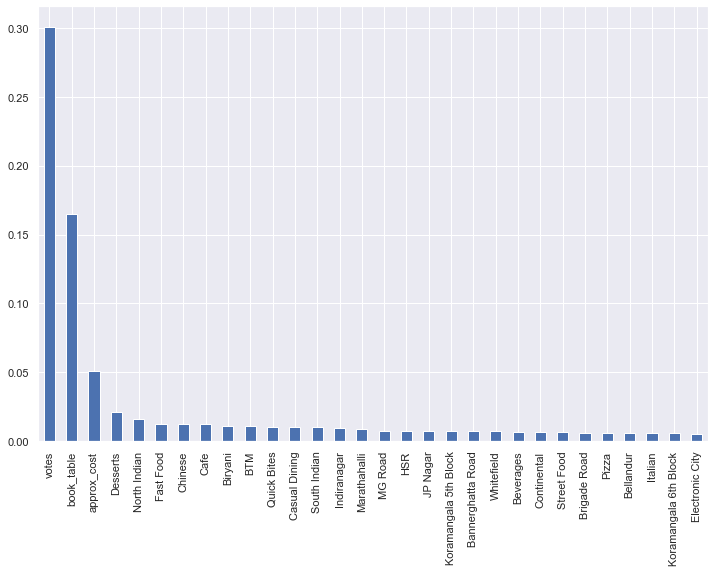

In [72]:
plt.figure(figsize=(12,8))
columns = data_with_location.drop("rate",axis=1).columns
fseries = pd.Series(imp_features1.feature_importances_, index=columns)
fseries.nlargest(30).plot(kind="bar")

In [73]:
imp_features2 = ExtraTreesRegressor()
imp_features2.fit(x2,y2)
print(imp_features2.feature_importances_)

[1.60205067e-01 3.36440938e-01 7.66825611e-02 4.27454749e-03
 9.38789558e-05 8.15032387e-04 2.46951665e-05 1.19674127e-02
 9.60246606e-04 1.24068633e-02 8.38975922e-04 8.92245990e-07
 3.64777629e-03 4.17055797e-03 1.72998794e-03 3.65357430e-03
 1.31543060e-02 1.41571050e-05 2.38970838e-04 3.01493864e-03
 3.74475836e-03 5.26052287e-04 1.11344395e-03 2.82697126e-06
 4.28181103e-03 1.90076837e-04 6.56332823e-03 2.88236359e-16
 1.11328292e-05 3.23709193e-03 4.34002457e-05 1.32161230e-02
 3.80393537e-04 2.49155836e-03 6.38237602e-06 1.88144837e-05
 2.90765915e-07 7.89723112e-03 3.02665231e-03 3.11926693e-03
 4.27957614e-06 1.98197508e-03 5.30951604e-03 3.15437531e-04
 1.86247081e-03 3.60589782e-03 8.66658351e-04 7.43076881e-05
 5.58459436e-03 6.55249376e-04 1.47932262e-02 1.12143158e-06
 5.46278867e-06 1.52799849e-03 2.65313766e-03 4.05024687e-03
 1.70496529e-04 3.56607391e-04 3.07144820e-04 9.54020347e-03
 0.00000000e+00 2.14642323e-04 1.05737120e-02 3.14701217e-03
 5.07803810e-05 8.698486

<AxesSubplot: >

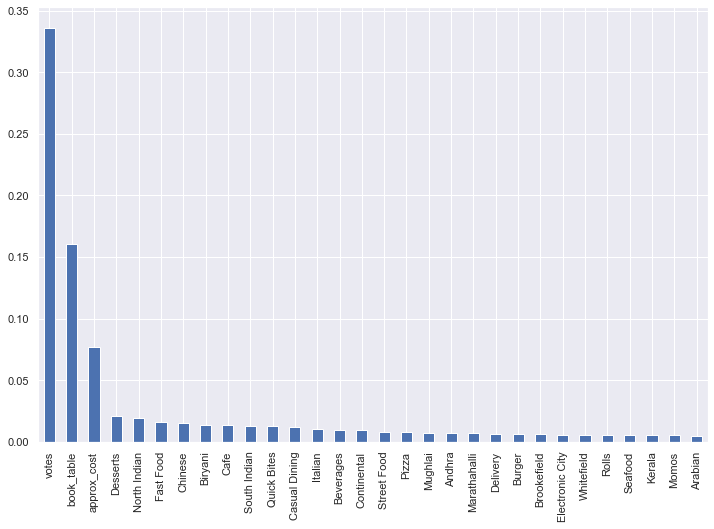

In [75]:
plt.figure(figsize=(12,8))
columns = data_with_place.drop("rate",axis=1).columns
fseries=pd.Series(imp_features2.feature_importances_,index = columns)
fseries.nlargest(30).plot(kind="bar")

## Train Test Splitting of Data

In [76]:
from sklearn.model_selection import train_test_split

In [81]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [82]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size=0.2, random_state=45)

## Importing Machine Learning Modules

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

### Linear Regression

### For data_with_location

In [84]:
lr = LinearRegression()
lr.fit(X1_train, Y1_train)

LinearRegression()

In [86]:
Y_lr = lr.predict(X1_test)
Y_lr[:100]

array([3.62103851, 3.78182328, 3.59596661, 3.4982865 , 3.56418189,
       3.87919258, 3.55592136, 3.51452067, 3.8968427 , 3.52791692,
       3.56095236, 3.66182308, 3.5530573 , 3.60097046, 4.12487391,
       3.36138461, 3.82003988, 4.33887983, 3.48289524, 3.41375959,
       3.47597991, 3.49732438, 3.82648947, 3.60159016, 3.50047988,
       3.52413558, 3.85530294, 3.76841354, 3.62705742, 3.53109729,
       3.64866718, 3.67670869, 3.93559405, 3.73289028, 3.49500776,
       3.48081002, 4.4912882 , 3.56297927, 3.464735  , 3.77702641,
       3.59583641, 3.79785749, 3.54537625, 3.76557041, 3.47147371,
       3.63195759, 3.61459783, 3.47616169, 4.44851723, 4.16117319,
       3.52909959, 4.45434421, 3.66039098, 3.45071476, 3.59973825,
       3.71064881, 3.60216175, 3.57303097, 3.60714912, 3.54092843,
       3.76051243, 3.84662173, 3.46980843, 3.64114682, 4.04009576,
       4.29470309, 3.50146603, 3.63769538, 3.75288476, 3.49920761,
       3.66226776, 3.46778657, 3.59257961, 3.51530216, 3.46132

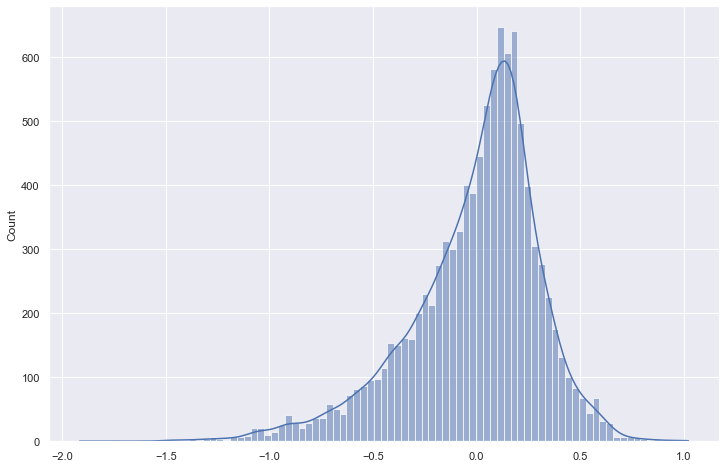

In [87]:
plt.figure(figsize=(12,8))
sns.histplot(Y1_test - Y_lr, kde=True)
plt.show()

#### For data_with_place

In [88]:
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train)

LinearRegression()

In [89]:
Y_lr2 = lr2.predict(X2_test)
Y_lr2[:100]

array([3.49415811, 3.62549628, 3.89308445, 3.55347087, 3.62088352,
       3.53180375, 4.13746822, 3.79529391, 3.65512601, 3.48331907,
       3.62494637, 3.70245665, 3.65189325, 4.08679569, 3.6371463 ,
       3.6772698 , 4.03320887, 3.56837311, 4.16658148, 3.56558448,
       3.674403  , 3.82030076, 3.49010302, 3.69204449, 3.73224167,
       3.97021389, 4.12755743, 3.4497874 , 3.50793171, 3.65205211,
       3.71068362, 3.67648111, 3.79250107, 3.75546361, 3.55802945,
       3.50976577, 4.32659964, 3.52754508, 3.74183702, 3.69763269,
       3.69193634, 3.58878544, 4.09875663, 3.62353222, 3.58487812,
       3.80087128, 3.80011164, 3.53118783, 3.45855578, 3.53424101,
       3.53277992, 3.8064762 , 3.82916497, 3.51586794, 3.86884814,
       3.84472714, 3.55623766, 3.66285788, 3.54194567, 3.56684155,
       3.61003003, 4.09916655, 3.58230434, 3.46196024, 4.18829128,
       3.78250124, 3.96421292, 3.61580904, 3.61485879, 3.80775517,
       3.648004  , 3.86600784, 3.55215499, 3.78690686, 3.48630

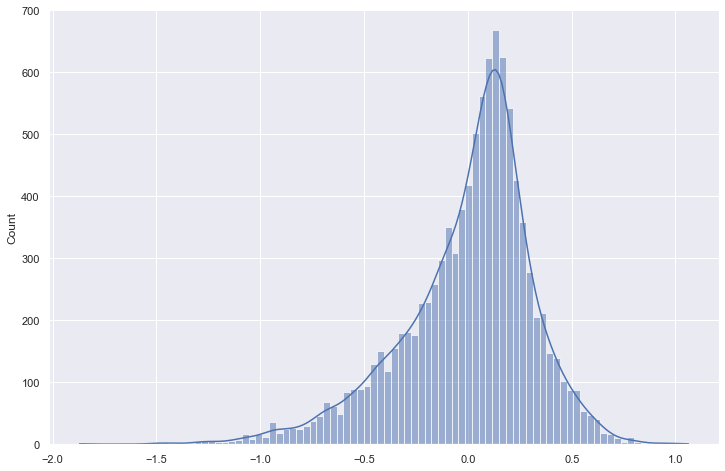

In [90]:
plt.figure(figsize=(12,8))
sns.histplot(Y2_test - Y_lr2, kde=True)
plt.show()

### Random Forest Regression

#### For data_with_location

In [91]:
rf = RandomForestRegressor()
rf.fit(X1_train, Y1_train)

RandomForestRegressor()

In [93]:
Y_rf = rf.predict(X1_test)
Y_rf[:100]

array([3.215     , 3.49066667, 3.7       , 3.17912143, 3.26144444,
       4.099     , 3.577     , 3.7       , 4.2       , 3.7       ,
       3.5       , 3.7       , 3.7       , 3.7       , 4.354     ,
       3.24      , 3.93715476, 4.2       , 3.7       , 3.2       ,
       3.156     , 3.7       , 3.7       , 3.74844286, 3.602     ,
       3.81623333, 3.7       , 4.3       , 3.5       , 3.372     ,
       3.501     , 3.36670714, 4.204     , 4.4       , 3.994     ,
       3.215     , 4.428     , 3.461     , 3.7       , 4.115     ,
       3.807     , 3.7       , 3.604     , 4.141     , 3.52873333,
       3.56866667, 4.013     , 3.284     , 4.4       , 4.203     ,
       3.8       , 4.2       , 3.7       , 3.008     , 3.7       ,
       3.873     , 3.3       , 3.869     , 3.7       , 3.7       ,
       3.7       , 3.9       , 2.897     , 3.65971429, 4.        ,
       4.10516667, 3.29766667, 3.108     , 3.987     , 3.311     ,
       3.7       , 3.684     , 3.628     , 3.38395   , 3.56020

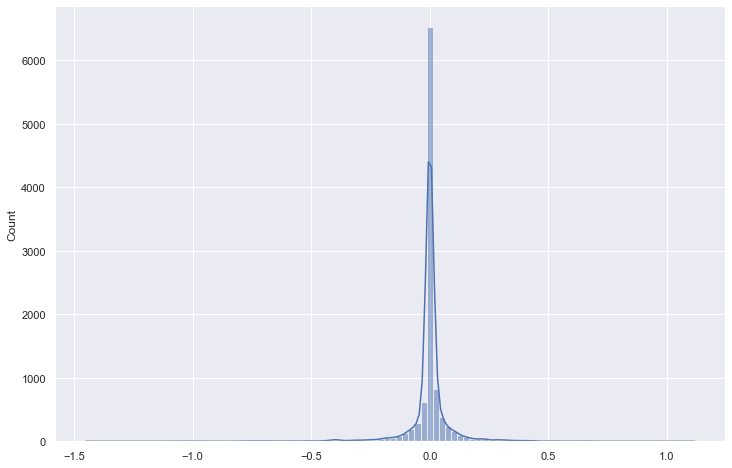

In [95]:
plt.figure(figsize=(12,8))
sns.histplot(Y1_test - Y_rf, kde=True, bins=100)
plt.show()

#### For data_with_place

In [96]:
rf2 = RandomForestRegressor()
rf2.fit(X2_train, Y2_train)

RandomForestRegressor()

In [97]:
Y_rf2 = rf2.predict(X2_test)
Y_rf2[:100]

array([3.7       , 4.089     , 4.3       , 3.271     , 3.408     ,
       3.7       , 4.2       , 4.19385714, 3.118     , 3.792     ,
       3.435     , 3.7       , 3.7       , 4.189     , 3.688     ,
       3.3       , 4.412     , 3.792     , 4.275     , 3.7       ,
       4.174     , 4.001     , 3.3       , 3.9       , 3.7       ,
       4.275     , 4.105     , 3.4625    , 3.7       , 3.7       ,
       3.604     , 3.898     , 4.065     , 3.903     , 3.7       ,
       3.202     , 4.499     , 3.15566667, 3.079     , 3.501     ,
       2.892     , 4.011     , 4.538     , 3.7       , 3.7       ,
       4.086     , 3.927     , 2.872     , 3.582     , 3.522     ,
       2.997     , 4.049     , 3.7       , 3.04133333, 3.693     ,
       3.9       , 3.581     , 3.787     , 3.7       , 3.392     ,
       3.425     , 4.2       , 3.893     , 3.7       , 4.4       ,
       3.997     , 4.028     , 3.718     , 3.433     , 3.862     ,
       3.182     , 4.1       , 3.7       , 3.69544444, 3.707  

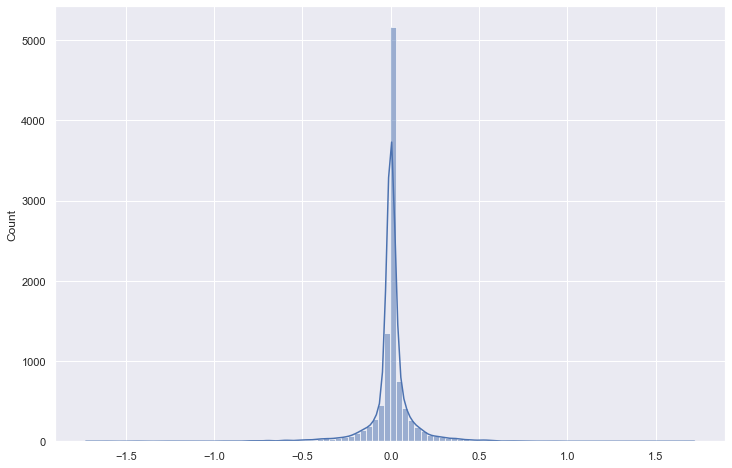

In [98]:
plt.figure(figsize=(12,8))
sns.histplot(Y2_test - Y_rf2, kde=True, bins=100)
plt.show()

### Decision Tree Regressor

#### for data_with_location

In [101]:
dt1 = DecisionTreeRegressor()
dt1.fit(X1_train,Y1_train)

DecisionTreeRegressor()

In [102]:
Y_dt1 = dt1.predict(X1_test)
Y_dt1[:100]

array([3.2       , 2.9       , 3.7       , 3.2       , 3.2       ,
       4.1       , 3.6       , 3.7       , 4.2       , 3.7       ,
       3.5       , 3.7       , 3.7       , 3.7       , 4.4       ,
       3.2       , 3.9       , 4.2       , 3.7       , 3.2       ,
       3.1       , 3.7       , 3.7       , 3.75      , 3.6       ,
       3.85      , 3.7       , 4.3       , 3.5       , 3.4       ,
       3.5       , 3.43333333, 4.2       , 4.4       , 4.        ,
       3.2       , 4.4       , 3.5       , 3.7       , 4.1       ,
       3.8       , 3.7       , 3.5       , 3.9       , 3.7       ,
       3.6       , 4.        , 3.3       , 4.4       , 4.2       ,
       3.8       , 4.2       , 3.7       , 3.        , 3.7       ,
       3.9       , 3.3       , 3.9       , 3.7       , 3.7       ,
       3.7       , 3.9       , 2.9       , 3.7       , 4.        ,
       4.1       , 3.3       , 3.1       , 4.        , 3.3       ,
       3.7       , 3.7       , 3.6       , 3.5       , 3.6    

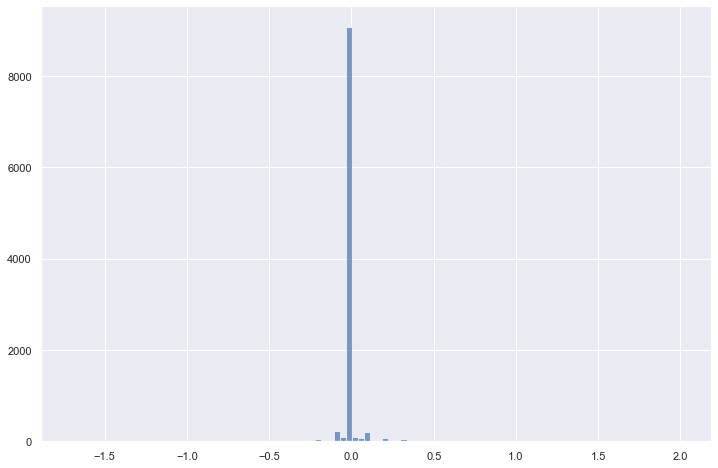

In [103]:
plt.figure(figsize=(12,8))
plt.hist(Y1_test - Y_dt1, bins=100, alpha=0.7)
plt.show()

#### for data_with_place

In [104]:
dt2 = DecisionTreeRegressor()
dt2.fit(X2_train, Y2_train)

DecisionTreeRegressor()

In [105]:
Y_dt2 = dt2.predict(X2_test)
Y_dt2[:100]

array([3.7 , 4.1 , 4.3 , 3.  , 3.5 , 3.7 , 4.2 , 4.2 , 3.1 , 3.9 , 3.7 ,
       3.7 , 3.7 , 4.2 , 3.7 , 3.3 , 4.4 , 2.7 , 4.3 , 3.7 , 4.2 , 4.  ,
       3.2 , 3.9 , 3.7 , 4.3 , 4.1 , 3.5 , 3.7 , 3.7 , 3.6 , 3.9 , 4.1 ,
       3.9 , 3.7 , 3.  , 4.5 , 3.1 , 2.8 , 3.5 , 2.8 , 3.8 , 4.6 , 3.7 ,
       3.7 , 4.1 , 3.9 , 2.7 , 3.7 , 3.5 , 3.1 , 4.1 , 3.7 , 3.  , 3.6 ,
       3.9 , 3.6 , 3.9 , 3.7 , 3.4 , 3.4 , 4.2 , 4.  , 3.7 , 4.4 , 4.  ,
       4.  , 3.7 , 3.4 , 4.1 , 3.1 , 4.1 , 3.7 , 3.7 , 3.9 , 4.8 , 3.3 ,
       3.9 , 4.1 , 4.  , 3.6 , 3.7 , 4.5 , 3.7 , 3.8 , 4.1 , 3.5 , 4.3 ,
       4.5 , 3.25, 3.7 , 3.3 , 3.85, 3.9 , 3.2 , 4.  , 3.7 , 3.7 , 3.3 ,
       3.9 ])

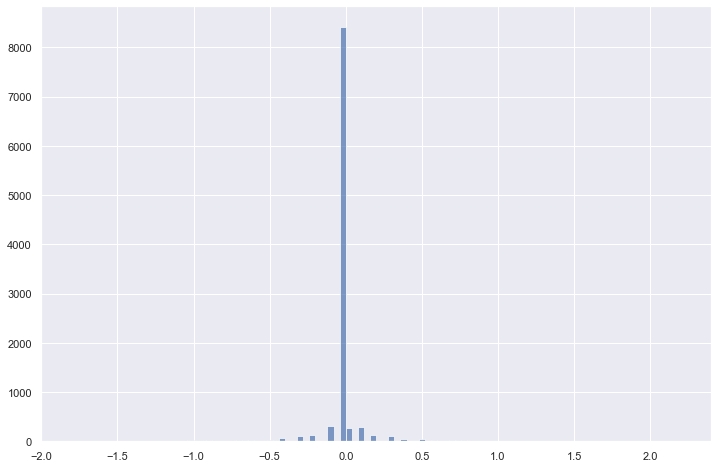

In [106]:
plt.figure(figsize=(12,8))
plt.hist(Y2_test - Y_dt2, bins=100, alpha=0.7)
plt.show()

## Model Evalution

### Linear Regression Model

#### For data_with_location

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [114]:
mae = mean_absolute_error(Y1_test, Y_lr)
mse = mean_squared_error(Y1_test, Y_lr)
r2_score = r2_score(Y1_test, Y_lr)

print("Coefficient of Determination for train data : ",lr.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",lr.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ",np.sqrt(mse))
print("R2 Score : ",r2_score)

Coefficient of Determination for train data :  0.3553317410636403
Coefficient of Determination for test data :  0.3560819651744258
Mean Absolute Error :  0.24039094570802402
Mean Squared Error :  0.10154007751357592
Root Mean Squared Error :  0.31865353836663407
R2 Score :  0.3560819651744258


#### For data_with_place

In [117]:
mae = mean_absolute_error(Y2_test, Y_lr2)
mse = mean_squared_error(Y2_test, Y_lr2)
r2score = r2_score(Y2_test, Y_lr2)

print("Coefficient of Determination for train data : ",lr2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",lr2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.3417461199303463
Coefficient of Determination for test data :  0.34406022199661956
Mean Absolute Error :  0.24255711374436173
Mean Squared Error :  0.1028051848856539
Root Mean Squared Error :  0.32063247634270287
R2 Score :  0.34406022199661956


### Random Forest Regression Model

#### For data_with_location

In [120]:
mae = mean_absolute_error(Y1_test,Y_rf)
mse = mean_squared_error(Y1_test, Y_rf)
r2score = r2_score(Y1_test, Y_rf)

print("Coefficient of Determination for train data : ",rf.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",rf.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9895656816990599
Coefficient of Determination for test data :  0.943569751424361
Mean Absolute Error :  0.03598330942960339
Mean Squared Error :  0.008898542212803338
Root Mean Squared Error :  0.09433208474746722
R2 Score :  0.943569751424361


#### for data_with_place

In [124]:
mae = mean_absolute_error(Y2_test, Y_rf2)
mse = mean_squared_error(Y2_test, Y_rf2)
r2score = r2_score(Y2_test, Y_rf2)

print("Coefficent of Determination for train data : ", rf2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",rf2.score(X2_train, Y2_train))
print("Mean Absolute Error : ",mse)
print("mean_squared_error : ",mse)
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score)

Coefficent of Determination for train data :  0.9829669101450917
Coefficient of Determination for test data :  0.9829669101450917
Mean Absolute Error :  0.01869456108502562
mean_squared_error :  0.01869456108502562
Root Mean Squared Error :  0.1367280552228606
R2 Score :  0.8807209358008409


## Conclusion :

- There are Three Model are treained, name as Multiple Linear Regression, random Forest Regression, and Decision Tree Regression respectively.
- Based on the analysis, the best model dor prediction is "Random Forest Regression Model".
- The Accuracy of the Selected model is 91% that is good !


## Saving the Model

In [126]:
import pickle
with open('rate_prediction.pkl', 'wb') as file:
    pickle.dump(rf, file)